<a href="https://colab.research.google.com/github/r5racker/012_RahilBhensdadia/blob/main/LAB_04_1_Weather_Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree


# step 2 :- Prepare dataset

In [ ]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
            'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

# step 3 :- digitize the data set using encoding

In [ ]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outlook mapping:",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("\n\nAfter Encoding")
print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outlook mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}


After Encoding
Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


# step 4 :- merge different features to prepare dataset

In [ ]:
# create a tuples of different values

features = tuple(zip(Outlook_encoded, Temperature_encoded, Humidity_encoded, Wind_encoded))
print("\nFeatures\n")
for pair in features:
  print(pair)



Features

(1, 1, 0, 0)
(1, 1, 0, 1)
(0, 1, 0, 0)
(2, 2, 0, 0)
(2, 0, 1, 0)
(2, 0, 1, 1)
(0, 0, 1, 1)
(1, 2, 0, 0)
(1, 0, 1, 0)
(2, 2, 1, 0)
(1, 2, 1, 1)
(0, 2, 0, 1)
(0, 1, 1, 0)
(2, 2, 0, 1)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, Play_encoded, test_size = 0.1, random_state = 54)
print(x_train)

[(2, 2, 1, 0), (2, 2, 0, 0), (2, 2, 0, 1), (0, 0, 1, 1), (1, 2, 1, 1), (0, 2, 0, 1), (1, 0, 1, 0), (1, 1, 0, 0), (1, 1, 0, 1), (1, 2, 0, 0), (0, 1, 0, 0), (2, 0, 1, 1)]


# step 5 :- train "Create and train DecisionTreeClassifier"

In [ ]:
# Create a decisionTreeCalssifier object

from sklearn import metrics

dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

# Accuracy
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))


Accuracy:  1.0


# step 6 :- Predict output for new data

In [ ]:
# Prediction
print(x_test)

# y_predicted = dtc.predict(x_test)
print("y predicted : ", y_pred)

# y_predicted = dtc.predict(x_test)
print(f"Actual y_test {y_test}")

[(2, 0, 1, 0), (0, 1, 1, 0)]
y predicted :  [1 1]
Actual y_test [1 1]


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[2]])

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

metrics.classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00         2\n\n    accuracy                           1.00         2\n   macro avg       1.00      1.00      1.00         2\nweighted avg       1.00      1.00      1.00         2\n'

Confusion matrix:
[[2]]


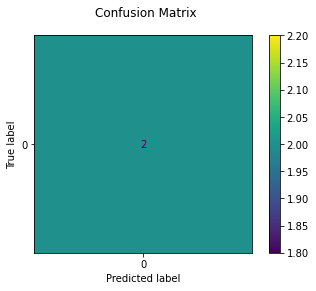

In [ ]:
disp = metrics.plot_confusion_matrix(dtc, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

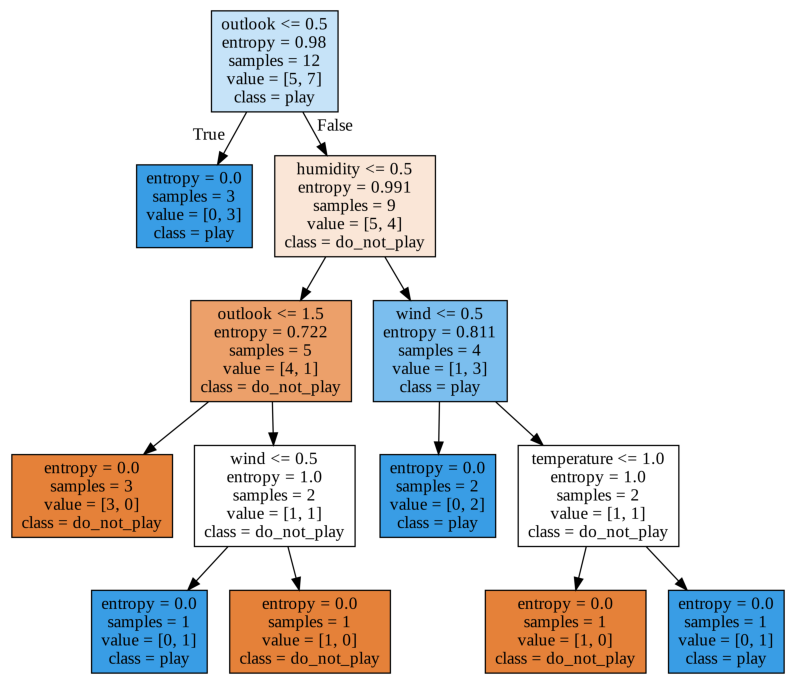

In [ ]:
from subprocess import call
export_graphviz(dtc,out_file='tree_entropy.dot',
               feature_names=['outlook','temperature','humidity','wind'],
               class_names=['do_not_play','play'], 
               filled=True)

# Convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

# Display in python
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();